# Lecture 1 - Frequency domain processing of signals and images 

## Organization

* Lecture: Monday, 10:15 - 11:45

* Exercise: Wednesday, 08:15 - 09:45

* [Moodle page](https://moodle.uni-jena.de/course/view.php?id=18834)

* To enroll, please send an email from your FSU account with the subject "moodle IP II"; I will then enroll you


## Outline

* Recap: Fourier series, discrete and fast Fourier transform

* Filtering in the time and spatial domain

* Filtering in the frequency domain

* Convolution (definition and convolution theorem) 

* Correlation and auto-correlation

# Fourier Series expansion

Under mild regularity conditions, we can represent $f(x)$ as
\begin{equation}\label{eq:fourier-series}
f(x) = a_0 + \sum_{n=1}^{\infty} \left[a_n \cos(nx) + b_n \sin(nx)\right]
\end{equation}
with 
\begin{equation}\label{eq:fourier-coefficients}
a_0 = \frac{1}{2\pi} \int_{-\pi}^\pi f(x)\, dx, \,\,\,
a_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x)\cos(nx)\, dx, \,\,\,
b_n = \frac{1}{\pi} \int_{-\pi}^\pi f(x)\sin(nx)\, dx \, .
\end{equation}
In complex form, we have
\begin{equation}\label{eq:complex-fourier-series}
f(x) = \sum_{n=-\infty}^{\infty} c_n e^{inx}
\end{equation}
with 
\begin{equation}\label{eq:complex-fourier-coefficients}
c_n = \frac{1}{2\pi} \int_{-\pi}^\pi f(x)e^{-inx}\, dx\, . 
\end{equation}

These relations also hold for multi-dimensional signal such as images.

## Example: square wave

$$
f(x) = \frac{4}{\pi} \sum_{n=1, 3, 5, \ldots} \frac{\sin(nx)}{n} 
$$

In [1]:
# Fourier transforms of signals and images
import numpy as np
import matplotlib.pylab as plt
import scipy.signal as signal

colors = [(.85, .3, .1), (.15, .35, .6), (.95, .7, 0.1), (.0, .0, .0),
          (.8, .8, .8)]

def square_wave(x):
    increment = (x[1]-x[0]) * 1e-5
    return 0.5 * (signal.square(x+increment) + signal.square(x-increment))

def s(x, n):
    """Contribution to the Fourier expansion of the square wave. """
    return 4/np.pi * np.sin(n*x) / n

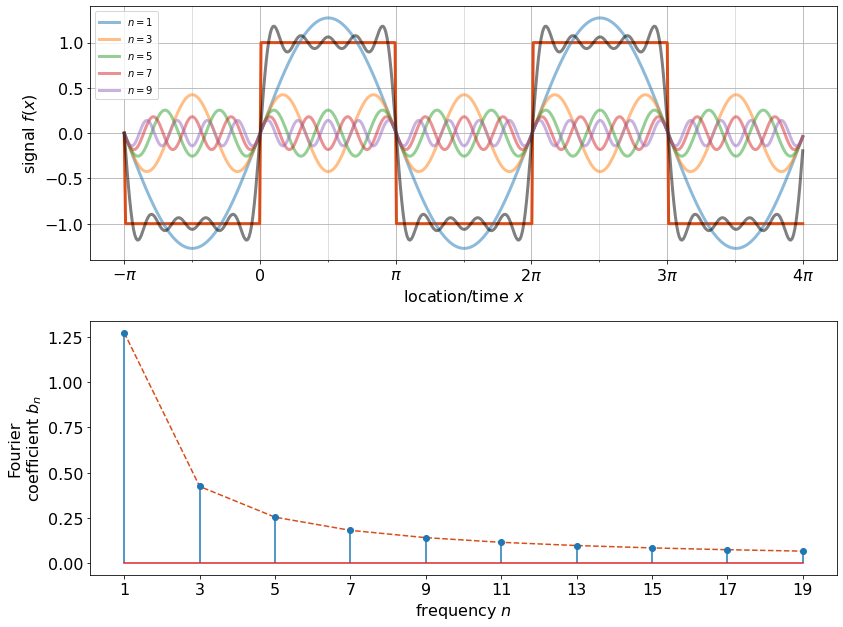

In [2]:
N = 512
x = np.linspace(-np.pi, 4*np.pi, N, endpoint=False)

plt.rc('font', size=16)
fig, axes = plt.subplots(2, 1, figsize=(12, 9))
ax = axes[0]
ax.plot(x, square_wave(x), color=colors[0], lw=3)
ax.set_xticks(np.linspace(x.min(), x.max(), 6))
ax.set_xticks(np.linspace(x.min(), x.max(), 6)+0.5*np.pi, minor=True)
ax.grid(True, which='minor', alpha=0.5)
ax.grid(True, which='major')
ax.set_xticklabels([r'$-\pi$', r'$0$', r'$\pi$', r'$2\pi$', r'$3\pi$', r'$4\pi$'])

s_sum = 0.
for n in (1, 3, 5, 7, 9):
    s_n = s(x, n)
    ax.plot(x, s_n, lw=3, alpha=0.5, label=r'$n={}$'.format(n))
    s_sum += s_n
ax.plot(x, s_sum, color=colors[3], lw=3, alpha=0.5)
ax.set_xlabel(r'location/time $x$')
ax.set_ylabel(r'signal $f(x)$')
ax.legend(loc=2, fontsize=10);

#Fourier coefficients
ax = axes[1]
N_max = 19
n = np.arange(1, N_max+1, 2)
b = 4/(np.pi * n)
S = np.sin(np.multiply.outer(x, n))

# plot Fourier coefficient b_n
ax.plot(n, b, ls='--', color=colors[0])
ax.stem(n, b, use_line_collection=True)
ax.set_xlabel(r'frequency $n$')
ax.set_ylabel('Fourier\n'+r'coefficient $b_n$')
ax.set_xticks(n);
fig.tight_layout()

We can do the same with images (two-dimensional signals $f(x, y)$):

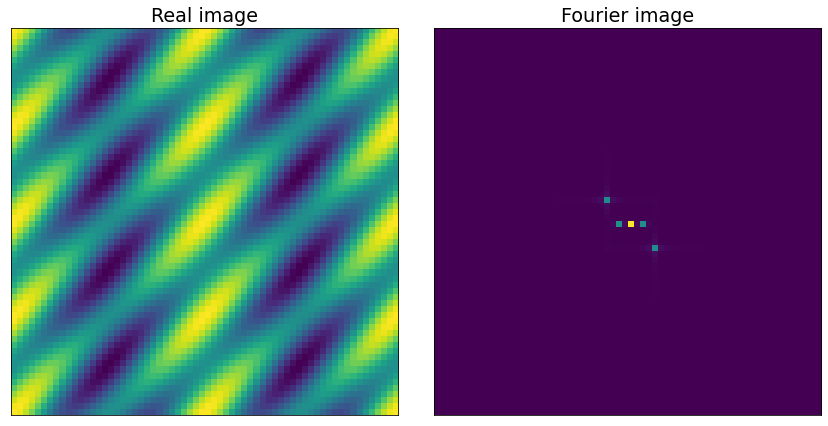

In [3]:
def ft(f):
    """Two-dimensional Fourier transform with zero-frequency shifted
    to image center. """
    return np.fft.fftshift(np.fft.fft2(f))

x = y = np.linspace(-np.pi, np.pi, 64)
X, Y = np.meshgrid(x, y)
f = 1 + np.cos(4*(X+Y)) + np.cos(2*X)

subplot_kw = dict(xticks=[], yticks=[])
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=subplot_kw)
ax[0].set_title('Real image')
ax[0].imshow(f, interpolation=None)
ax[1].set_title('Fourier image')
ax[1].imshow(np.abs(ft(f)), interpolation=None)
fig.tight_layout()

# Discrete Fourier transform

The [*discrete Fourier transform* (DFT)](https://en.wikipedia.org/wiki/Discrete_Fourier_transform) is the finite sum version of the integral (Eq. \ref{eq:complex-fourier-coefficients}):
\begin{equation}\label{eq:dft}
c_n = \frac{1}{2\pi} \int_{-\pi}^\pi f(x)e^{-inx}\, dx\, 
\,\,\,\Longrightarrow\,\,\,
c_n =  \frac{1}{N} \sum_{m=0}^{N-1} f_m\, e^{-2\pi i nm/N}
\end{equation}
where $N$ is a finite integer. The signal is evaluated ("sampled") at discrete locations/times $x_m=2\pi m/N$ where $m \in \{0, 1, \ldots,  (N-1) \}$ such that $f_m = f(x_m) = f(2\pi m/N)$. By convention, we rather work with
$$
\hat f_n =  N c_n = \sum_{m=0}^{N-1} f_m\, e^{-2\pi i nm/N}
$$
where $\hat f_n$ is the Fourier transform of $f_n$.

The DFT can be written compactly using matrix-vector multiplication. If $\pmb f \in \mathbb{C}^N$ is the $N$-dimensional vector/array $\pmb f = [f_0, \ldots, f_{N-1}]$ then
\begin{equation}\label{eq:dft-matrix}
\hat{\pmb f} = \pmb F_N \pmb f
\end{equation}
where $\pmb F_N$ is the $N$-dimensional DFT matrix with elements $(\pmb F_{N})_{mn} = \omega^{mn}$ where $\omega = e^{-2\pi i/N}$ is the $N$-th root of unity. In practice, it is much faster to compute the DFT by using the Fast Fourier Transform (FFT). 

The DFT can be inverted:
$$
f_m = \frac{1}{N} \sum_{n=0}^{N-1} \hat f_n\, e^{2\pi i nm/N} 
$$
where $\hat f_n$ is the Fourier transform of $f_n$. That is, the inverse DFT matrix is
$$
(\pmb F_N^{-1})_{nm} = \frac{1}{N} e^{2\pi i nm/N} 
$$

Let's write out the DFT and inverse DFT matrix explicitly: 
\begin{align}\label{eq:dft-idft-matrix}
\begin{split}
\pmb F_N &= \begin{pmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega & \omega^2 & \cdots & \omega^{N-1} \\
1 & \omega^2 & \omega^4 & \cdots & \omega^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega^{N-1} & \omega^{2(N-1)} & \cdots & \omega^{(N-1)^2} \\
\end{pmatrix}\\[0.5cm]
\pmb F_N^{-1} &= \frac{1}{N} \begin{pmatrix}
1 & 1 & 1 & \cdots & 1 \\
1 & \omega^* & (\omega^*)^2 & \cdots & (\omega^*)^{N-1} \\
1 & (\omega^*)^2 & (\omega^*)^4 & \cdots & (\omega^*)^{2(N-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & (\omega^*)^{N-1} & (\omega^*)^{2(N-1)} & \cdots & (\omega^*)^{(N-1)^2} \\
\end{pmatrix} = \frac{1}{N} \pmb F_N^*\, .
\end{split}
\end{align}

### Example: DFT for $N=2$

The signal has two elements $\pmb f = [f_0, f_1]$. The square root of unity is 
$$
\omega = \exp\{-2\pi i/N\} \overset{N=2}{=} \exp\{-\pi i\} = \cos\pi - i\sin\pi = -1
$$
The DFT matrix is a $2\times 2$ matrix:
$$
\pmb F = \begin{pmatrix}
1 & 1  \\
1 & \omega \\
\end{pmatrix} = \begin{pmatrix}
1 & 1  \\
1 & -1\\
\end{pmatrix}
$$
Therefore, 
$$
\hat{\pmb f} = \begin{pmatrix}
1 & 1  \\
1 & -1\\
\end{pmatrix} 
\begin{pmatrix}
f_0  \\
f_1\\
\end{pmatrix}= \begin{pmatrix}
f_0 + f_1 \\
f_0 - f_1\\
\end{pmatrix}\, .
$$

In [4]:
# check equation for random signal
f = np.random.randn(2) + 1j * np.random.randn(2)
F = np.array([f[0]+f[1], f[0]-f[1]])
print(f'  Signal: {f}')
print(f'     FFT: {np.fft.fft(f)}')
print(f'Equation: {F}')

  Signal: [ 0.88719882+0.1454988j  -0.89724717+1.28676582j]
     FFT: [-0.01004834+1.43226462j  1.78444599-1.14126702j]
Equation: [-0.01004834+1.43226462j  1.78444599-1.14126702j]


## DFT of two-dimensional signals

The DFT can also be defined for multi-dimensional signals such as images or volumes. For images $\pmb f\in\mathbb C^{N\times N}$, for example, we have
\begin{equation}\label{eq:dft2}
\hat f_{kl} = \sum_{m=1}^N \sum_{n=1}^N \omega^{km} \omega^{ln} f_{mn}
\end{equation}
In matrix-vector notation
\begin{equation}\label{eq:dft2-matrix-vector}
\hat{\pmb f} = \pmb F_N \pmb f \pmb F_N\, .
\end{equation}
The FFT implementation for 2D signals offered by NumPy is ``np.fft.fft2``. 

# Fourier domain processing

Often it is convenient to process a signal / image in the frequency domain. To do so, we first  compute the Fourier transform, apply some operation on the Fourier-transformed signal to obtain a modified signal in the frequency domain, and finally back-transform to the real domain by an inverse Fourier transform. 

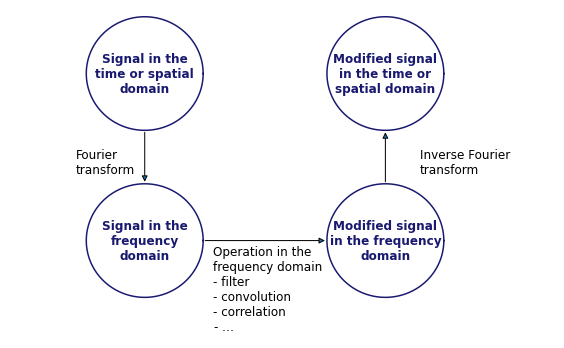

In [5]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_xlim(0, 16)
ax.set_ylim(-1, 9)
ax.axis('off')

centers = [(4, 7), (4, 2), (11, 2), (11, 7)]
radius = 1.7
texts = [
    "\n".join(["Signal in the", "time or spatial", "domain"]),
    "\n".join(["Signal in the", "frequency", "domain"]),
    "\n".join(["Modified signal", "in the frequency", "domain"]),
    "\n".join(["Modified signal", "in the time or", "spatial domain"]),
]

# Draw circles with text in the center

for i, center in enumerate(centers):
    x, y = center
    theta = np.linspace(0, 2 * np.pi, 100)
    ax.plot(
        x + radius * np.cos(theta),
        y + radius * np.sin(theta),
        color="midnightblue",
    )
    ax.text(
        x, y,
        texts[i],
        horizontalalignment="center",
        verticalalignment="center",
        color="midnightblue",
        fontweight='bold', 
    )

ax.annotate(
    "",
    (centers[1][0], centers[1][1] + radius),
    (centers[0][0], centers[0][1] - radius),
    arrowprops=dict(arrowstyle = "-|>"),
)
ax.annotate(
    "",
    (centers[2][0] - radius, centers[2][1]),
    (centers[1][0] + radius, centers[1][1]),
    arrowprops=dict(arrowstyle = "-|>"),
)
ax.annotate(
    "",
    (centers[3][0], centers[3][1] - radius),
    (centers[2][0], centers[2][1] + radius),
    arrowprops=dict(arrowstyle = "-|>"),
)

ax.annotate(
    "Fourier\ntransform",
    (centers[0][0] - 2, (centers[0][1] + centers[1][1])/2-0.5)
)


ax.annotate(
    "Inverse Fourier\ntransform",
    (centers[3][0] + 1, (centers[3][1] + centers[2][1])/2-0.5)
)

ax.annotate(
    "\n".join(["Operation in the\nfrequency domain", 
               "- filter", "- convolution", "- correlation", r"- $\ldots$"]),
    ((centers[2][0] + centers[1][0])/2-1.5, (centers[2][1]-2.7))
)

fig.tight_layout()


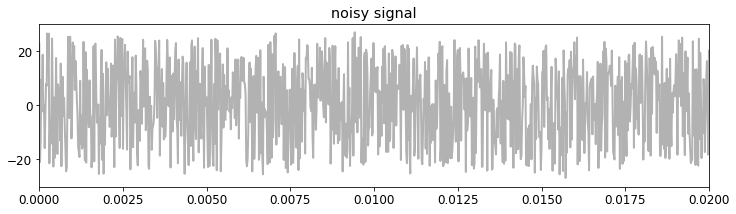

In [6]:
"""
Example: filtering of a noisy signal
"""
# sampling rate in Hz 
sampling_rate = 50000

# create a time axis
t = np.arange(0, 2, 1/sampling_rate)

# generate three signals
freqs = np.arange(1, 4) * 440
signals = np.sin(2*np.pi*np.multiply.outer(freqs, t))
signal = signals.sum(0)
xlim = (0., 0.02)

# generate noise and add it to the signal
noise = 25 * np.random.uniform(-1., 1., size=t.size)
noisy_signal = signal + noise

fig, ax = plt.subplots(figsize=(12, 3))
ax.plot(t, noisy_signal, color='k', ls='-', lw=2, alpha=0.3)
ax.set_title('noisy signal')
ax.set_xlim(*xlim);

number of filtered elements: 6


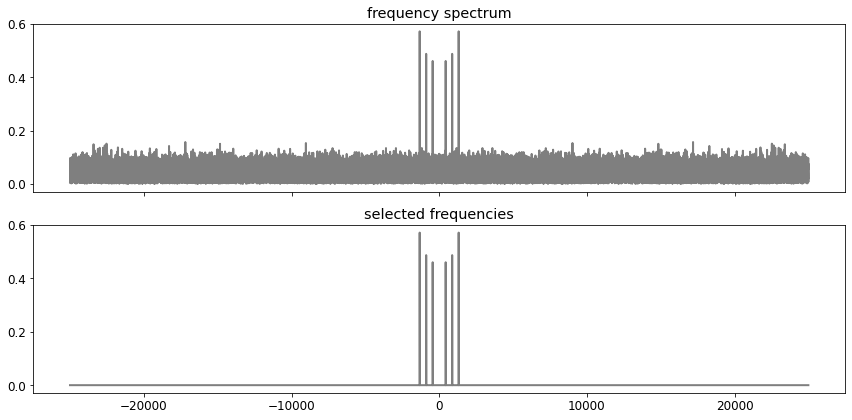

In [7]:
# compute and show the frequency spectrum ---
ft = np.fft.fft(noisy_signal)
amplitudes = np.abs(ft)

# wrap amplitudes such that the zero frequency component is centered and scale
# the amplitudes by the number of data points
amplitudes = np.fft.fftshift(amplitudes) / t.size
frequencies = np.linspace(-0.5, 0.5, len(t)) * sampling_rate

# filter the signal: extract frequency components that exceed a threshold 
mask = amplitudes > 0.5 * np.max(amplitudes)

# show the frequency spectrum
plot_kw = dict(color='k', lw=2, alpha=0.5)
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex='all', sharey='all')
ax[0].plot(frequencies, amplitudes, **plot_kw)
ax[0].set_title('frequency spectrum')
ax[1].plot(frequencies, amplitudes*mask, **plot_kw)
ax[1].set_title('selected frequencies')
fig.tight_layout()
print('number of filtered elements:', mask.sum())

In [8]:
# Transform the spectrum back to the time domain 
filtered = np.fft.ifft(ft * np.fft.ifftshift(mask)).real

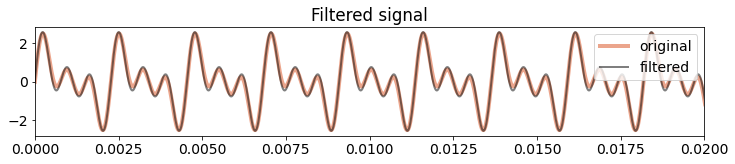

In [14]:
plt.rc('font', size=14)
fig, ax = plt.subplots(figsize=(12, 2)) 
ax.plot(t, signal, lw=4, color=colors[0], alpha=0.5, label='original')
ax.plot(t, filtered, label='filtered', **plot_kw)
ax.set_title('Filtered signal')
ax.legend(loc=1)
ax.set_xlim(*xlim);

# Convolution

An important operation on signals and images is a [convolution](https://en.wikipedia.org/wiki/Convolution). The convolution of a function $f$ with another function $g$ is defined as the integral of the product of the two functions after one is reversed and shifted:
\begin{equation}\label{eq:convolution}
(f \otimes g)(x) = \int_{-\infty}^\infty f(y)\, g(x - y)\, dy
\end{equation}
Equation (\ref{eq:convolution}) can be interpreted as a weighted average of the function $f(y)$ at $y$ where the weighting is given by $g(-y)$ simply shifted by $x$. As $x$ changes, the weighting function emphasizes different parts of the input function.

The convolution is commutative, therefore an equivalent definition is:
\begin{equation}\label{eq:convolution2}
(f \otimes g)(x) = \int_{-\infty}^\infty f(x-y)\, g(y)\, dy
\end{equation}

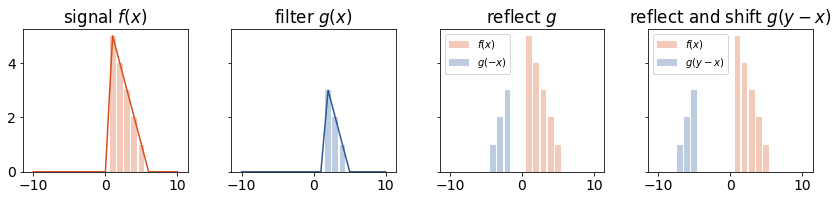

In [15]:
# convolution demo for two simple signals
def func(x, a, b):
    return (b-x) * ((x>=a) & (x<=b))

def f(x):
    return func(x, 1, 6)
    y = 6 - x
    return y * ((x>=1.) & (x<=6.))
    
def g(x):
    return func(x, 2, 5)
    y = 5 - x
    return y * ((x>=2.) & (x<=5.))

def plot_func(x, func, ax, color, plot_kw=dict(lw=2, alpha=0.7)):
    f = func(x)
    ax.bar(x, f, color=color, alpha=0.3)

x = np.linspace(-10, 10, 21)
dx = x[1]-x[0]
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharex='all', sharey='all')
# show signal
ax = axes[0]
ax.set_title(r'signal $f(x)$')
ax.plot(x, f(x), color=colors[0])
plot_func(x, f, ax, colors[0])
# show filter
ax = axes[1]
ax.set_title(r'filter $g(x)$')
ax.plot(x, g(x), color=colors[1])
plot_func(x, g, ax, colors[1])
# reflect g
ax = axes[2]
ax.set_title(r'reflect $g$')
plot_func(x, f, ax, colors[0])
plot_func(x, lambda x: g(-x), ax, colors[1])
ax.legend([r'$f(x)$', r'$g(-x)$'], fontsize=10)
# reflect and shift g
ax = axes[3]
y = -3
ax.set_title(r'reflect and shift $g(y-x)$')
plot_func(x, f, ax, colors[0])
plot_func(x, lambda x: g(y-x), ax, colors[1])
ax.legend([r'$f(x)$', r'$g(y-x)$'], fontsize=10);
fig.tight_layout()

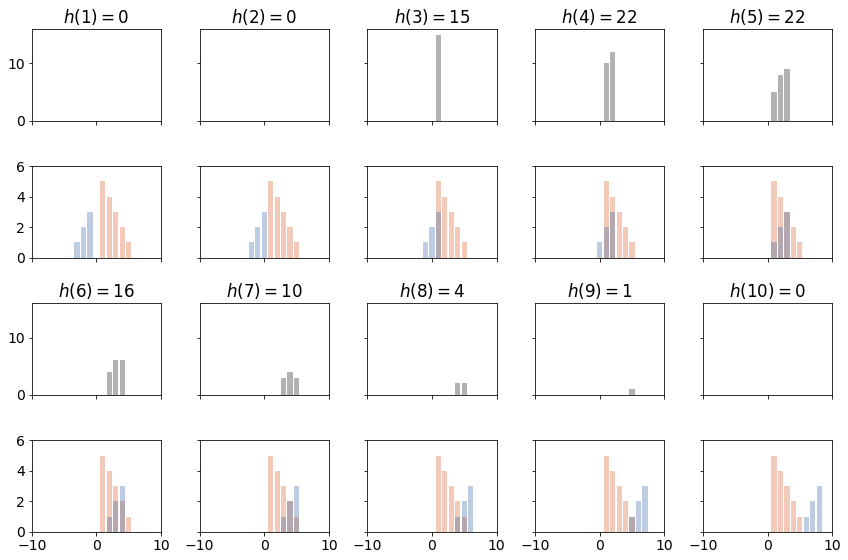

In [16]:
# convolution
yvals = np.arange(1, 11)
h = []
fig, ax = plt.subplots(4, 5, figsize=(12, 8), sharex='all', sharey='row')
for a, b, y in zip(np.append(ax[0], ax[2]), np.append(ax[1], ax[3]), yvals):
    h.append(f(x) @ g(y-x) * dx)
    a.set_title(r'$h({1})={0:.0f}$'.format(h[-1], y))
    plot_func(x, lambda x, y=y: f(x)*g(y-x), a, colors[3])
    plot_func(x, f, b, colors[0])
    plot_func(x, lambda x, y=y: g(y-x), b, colors[1])
for a in (ax[0,0], ax[2,0]):
    a.set_ylim(0, 16)
for a in (ax[1,0], ax[3,0]):
    a.set_ylim(0, 6)
a.set_xlim(-10, 10.)
fig.tight_layout()

The resulting convolution $h$ is:

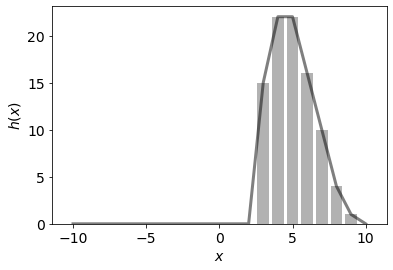

In [17]:
h = np.array([f(x)@g(y-x) for y in x])
fig, ax = plt.subplots()
ax.plot(x, h, color=colors[3], lw=3, alpha=0.5)
ax.bar(x, h, color=colors[3], alpha=0.3)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$h(x)$');

## Properties of the convolution

The convolution is [commutative, distributive and associative](https://en.wikipedia.org/wiki/Convolution#Properties):
\begin{align}\label{eq:convolution-properties}
\begin{split}
f \otimes g &= g \otimes f \\
f \otimes (g + h) &= f \otimes g + f \otimes h \\
f \otimes (g \otimes h) &= (f \otimes g) \otimes h
\end{split}
\end{align}

In NumPy, a convolution can be computed by the function ``np.convolve``. For comparison, let us implement a convolution from scratch:

In [18]:
def convolve(f, g):
    """Returns full convolution. 
    
    Parameters
    ----------
    f : np.ndarray
        The first argument is the signal.
        
    g : np.ndarray
        The second argument is the filter. It is assumed that 
        the size of the signal is at least the size of the 
        filter.  
        
    Returns
    -------
    Full convolution stored in an array of size 'len(f)+len(g)-1'
    """
    N, M = len(f), len(g)
    assert N >= M

    # reverse filter
    g = g[::-1]
    
    # pad zeros to signal
    f = np.pad(f, M-1)
    
    return np.array([f[i:i+M] @ g for i in range(N+M-1)])

In [19]:
f = np.array([0, 1, 0, 0, 0])
g = np.array([1, 2, 3])

h = np.convolve(f, g)
print(h)
print(convolve(f, g))
print(np.allclose(h, convolve(f, g)))

[0 1 2 3 0 0 0]
[0 1 2 3 0 0 0]
True


NumPy's ``np.pad(f, m)`` command adds ``m`` zeros at the beginning and end of the array ``f``:

In [20]:
m = 4
print('[' + ' '.join(np.pad(['f[0]', 'f[1]', '...', 'f[n-1]'], m)) + ']')

[0 0 0 0 f[0] f[1] ... f[n-1] 0 0 0 0]


If necessary, the result of a convolution can be truncated to the size of the original arrays. The corresponding NumPy command is:

In [21]:
f = np.array([0, 1, 0, 0, 0])
g = np.array([1, 2, 3])
print(np.convolve(f, g, 'full')) # full convolution
print(np.convolve(f, g))         # full convolution is returned by default
print(np.convolve(f, g, 'same')) # same size as f 

[0 1 2 3 0 0 0]
[0 1 2 3 0 0 0]
[1 2 3 0 0]


## The convolution theorem

The [convolution theorem](https://en.wikipedia.org/wiki/Convolution#Convolution_theorem) states that the Fourier transform of a convolution of two signals is the pointwise product of their Fourier transforms:
\begin{equation}\label{eq:convolution-theorem}
\mathcal{F}\{f \otimes g\} =  \mathcal{F}\{f\} \odot \mathcal{F}\{g\}
\end{equation}
where $\mathcal{F}$ denotes the Fourier transform of the functions and $\odot$ is the element-wise product (also known as [Hadamard product](https://en.wikipedia.org/wiki/Hadamard_product_(matrices))). In other words, convolution in one domain (e.g. time or spatial domain) equals element-wise multiplication in the other domain (e.g. frequency domain).

### Application: denoising by a sliding or moving average

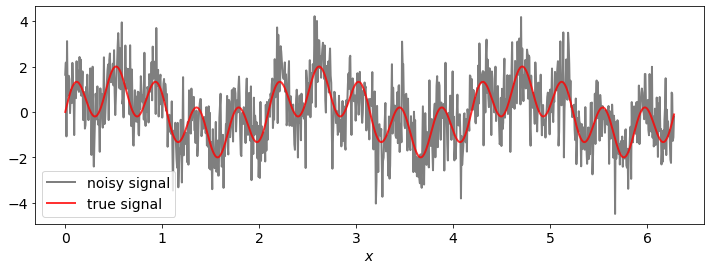

In [22]:
# true signal
N = 2**10
x = np.linspace(0., 2*np.pi, N, endpoint=False)
freqs = [3, 15]
signal = np.sum(np.sin(np.multiply.outer(x, freqs)), axis=1)

# add some noise with chosen signal-to-noise ratio (SNR)
snr = 1
sigma = np.sqrt(np.var(signal)/snr)
noise = np.random.standard_normal(signal.shape) * sigma

# observed: signal + noise
f = signal + noise

plot_kw = dict(color='k', alpha=0.5, lw=2)
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, f, **plot_kw, label='noisy signal')
ax.plot(x, signal, color='r', lw=2, alpha=0.8, label='true signal')
ax.set_xlabel(r'$x$')
ax.legend();

We want to recover the true signal from the noisy observation. A simple approach is to compute a *moving* average, because the noise averages out:

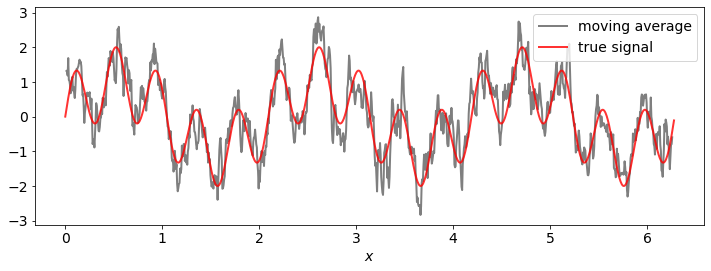

In [23]:
window = 5
x_average = [np.mean(x[i-window:i]) for i in range(window, N)]
f_average = [np.mean(f[i-window:i]) for i in range(window, N)]

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x_average, f_average, **plot_kw, label='moving average')
ax.plot(x, signal, color='r', lw=2, alpha=0.8, label='true signal')
ax.set_xlabel(r'$x$')
ax.legend();

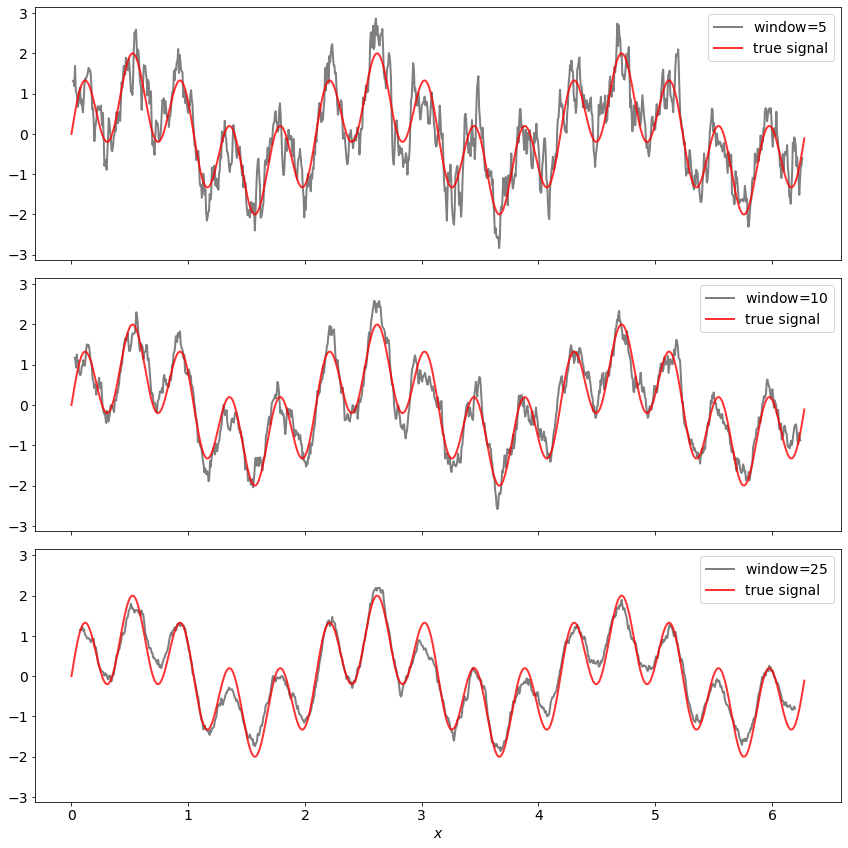

In [24]:
# let's define a convenience function
def moving_average(x, window=5):
    return np.array([np.mean(x[i-window:i]) for i in range(window, N)])

fig, ax = plt.subplots(3, 1, figsize=(12, 12), sharex='all', sharey='all')
for i, window in enumerate([5, 10, 25]):
    ax[i].plot(moving_average(x, window), moving_average(f, window), 
               **plot_kw, label=r'window=${}$'.format(window))
    ax[i].plot(x, signal, color='r', lw=2, alpha=0.8, label='true signal')
    ax[i].legend()
ax[i].set_xlabel(r'$x$')
fig.tight_layout()

The sliding average can be interpreted as a convolution with a rectangular pulse of size $w$ (where $w$ is the window used in the averaging):

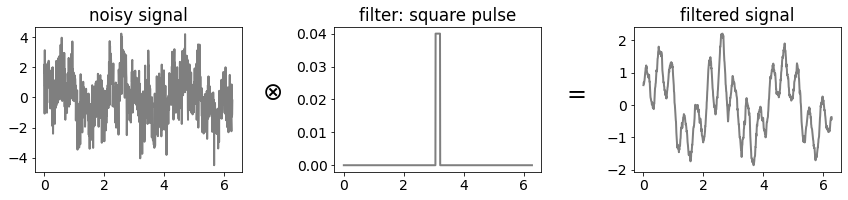

In [25]:
g = np.zeros_like(f)
g[:window//2] = 1/window
g[-window//2:] = 1/window
g = np.fft.ifftshift(g)

fig, ax = plt.subplots(1, 3, figsize=(12, 3), sharex='all')
ax[0].set_title('noisy signal')
ax[0].plot(x, f, **plot_kw)
ax[0].annotate(r'$\otimes$', xy=(1.1, .5), fontsize=24, xycoords='axes fraction')
ax[1].set_title('filter: square pulse')
ax[1].plot(x, g, **plot_kw)
ax[1].annotate(r'$=$', xy=(1.1, .5), fontsize=24, xycoords='axes fraction')
ax[2].set_title('filtered signal')
ax[2].plot(x, np.convolve(f, g, mode='same'), **plot_kw)
fig.tight_layout()


So we can use the convolution theorem to implement the moving average. In NumPy, this boils down to
```python
filtered_signal = np.fft.ifft(np.fft.fft(signal) * np.fft.fft(filter))
```
Notice that ``signal`` and ``filter`` must have the same size. If this is not the case ``filter`` must be padded with zeros so as to match the size of ``signal``. 

In [26]:
def filter_signal(signal, filter):
    if filter.size < signal.size:
        filter = np.pad(signal, signal.size//2)
    return np.real(np.fft.ifft(np.fft.fft(signal) * np.fft.fft(filter)))

def rectangular_pulse(size, window_size):
    """Generate a rectangular pulse of size `window_size`. """
    rect = np.zeros(size)
    # since signals are assumed to start at zero we have to
    # set the first and last entries to 1/window
    rect[:window//2] = 1/window
    rect[-window//2:] = 1/window
    return np.fft.ifftshift(rect)
    
def moving_average_fft(f, window=5):
    g = rectangular_pulse(f.size, window)
    # need to more x=0 to the start
    g = np.fft.fftshift(g)
    return filter_signal(f, g)[window//2:-window//2]

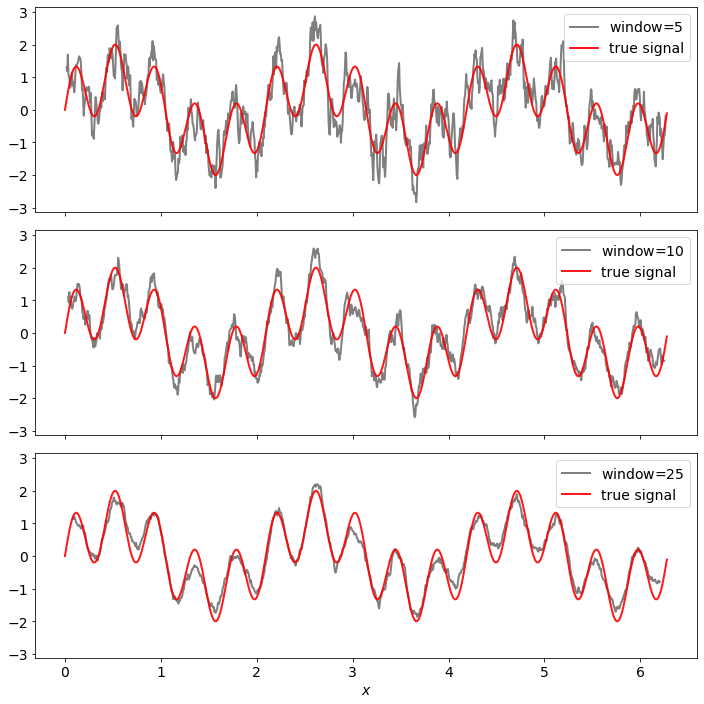

In [27]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10), sharex='all', sharey='all')
for i, window in enumerate([5, 10, 25]):
    ax[i].plot(moving_average_fft(x, window), 
               moving_average_fft(f, window), 
               **plot_kw, label=r'window=${}$'.format(window))
    ax[i].plot(x, signal, color='r', lw=2, alpha=0.9, label='true signal')
    ax[i].legend()
ax[i].set_xlabel(r'$x$')
fig.tight_layout()

## NumPy functions for convolution in 1 dimension

There are various options for computing the convolution of two signals in NumPy:

1. __FFT__: ``np.fft.ifft(np.fft.fft(f) * np.fft.fft(g))``. Note that ``f`` and ``g`` must be padded with zeros so that they have the same size.

2. __NumPy__: For convolving arrays also the command ``np.convolve(f, g)`` can be used. ``f`` and ``g`` do not need to have the same size. ``np.convolve(f, g, 'full')`` returns the convolution of vectors ``f`` and ``g``. Calling ``np.convolve(f, g, 'same')`` will return the central part of the convolution having the same size as ``f``.

3. __SciPy__: The submodules ``scipy.signal`` offers two implementations of convolutions of 1D signals: ``scipy.signal.convolve`` and ``scipy.signal.fftconvolve``

convolve True
convolve True
fftconvolve True
convolve True


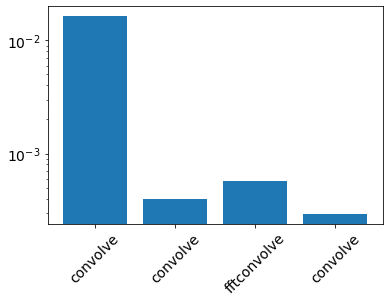

In [28]:
# comparison of convolution functions
import time
import scipy.signal

funcs = [convolve, 
         np.convolve, 
         scipy.signal.convolve, 
         scipy.signal.fftconvolve]

n, m = 2**13, 2**6

f = np.random.standard_normal(n)
g = np.random.standard_normal(m)

times = []
funcs = [convolve, 
         np.convolve, 
         scipy.signal.fftconvolve, 
         scipy.signal.convolve]

h = []
for func in funcs:
    start = time.process_time()
    h.append(func(f, g))
    times.append(time.process_time() - start)

for i, func in enumerate(funcs):
    print(func.__name__, np.allclose(h[0], h[i]))

plt.close('all')
fig, ax = plt.subplots()
ax.bar(np.arange(len(funcs)), times)
ax.semilogy()
ax.set_xticklabels([func.__name__ for func in funcs], rotation=45)
ax.set_xticks(np.arange(len(funcs)));

## Smoothing spatial filters

Convolution of a 2D filter with a discrete unit pulse (2D delta peak)

In [29]:
# pulse
n = 2
f = np.zeros((2*n+1, 2*n+1), dtype=int)
f[n, n] = 1

# filter
w = np.arange(1, 10, dtype=int).reshape(3, 3)

print('pulse:\n{}\n\nfilter:\n{}'.format(f, w))

pulse:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

filter:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [30]:
# padding
f_padded = np.pad(f, len(w)-1)

print('padded filter:\n{}'.format(f_padded))

padded filter:
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]


In [31]:
# reversed filter
w_reversed = w[::-1, ::-1]

print('reversed filter:\n{}'.format(w_reversed))

reversed filter:
[[9 8 7]
 [6 5 4]
 [3 2 1]]


In [32]:
for i in range(f_padded.shape[0]-len(w)+1):
    for j in range(f_padded.shape[1]-len(w)+1):
        h = np.sum(f_padded[i:i+len(w), j:j+len(w)] * w_reversed)
        print(h, end='   ')
    print('\n')

0   0   0   0   0   0   0   

0   0   0   0   0   0   0   

0   0   1   2   3   0   0   

0   0   4   5   6   0   0   

0   0   7   8   9   0   0   

0   0   0   0   0   0   0   

0   0   0   0   0   0   0   



In [33]:
def convolve2d(f, g):
    """Full convolution of 2D signals. """
    n, m = len(f), len(g)
    # reverse filter
    g = g[::-1, ::-1]
    
    # pad zeros to signal
    f = np.pad(f, m-1)
    
    h = [np.sum(f[i:i+m, j:j+m] * g)
         for i in range(n+m-1) for j in range(n+m-1)]
    
    return np.array(h).reshape(n+m-1, n+m-1)

In [34]:
# apply to example
print('pulse:\n' + '='*14)
print(f)

print('\nfilter:\n' + '='*10)
print(w)

print('\nfiltered pulse:\n' + '='*18)
print(convolve2d(f, w))

pulse:
[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

filter:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

filtered pulse:
[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


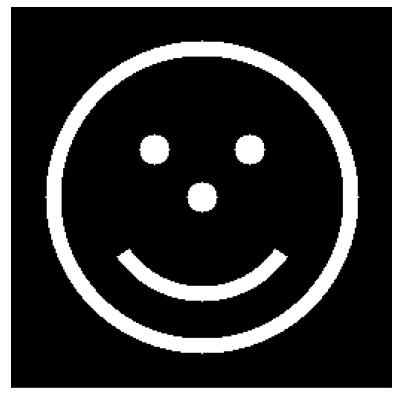

In [35]:
def circle(f, radius, center=None, tolerance=1, angle_range=None):
    if center is None:
        center = [f.shape[0]//2, f.shape[1]//2]
    i, j = np.indices(f.shape)
    x, y = i-center[0], j-center[1]
    r = np.sqrt(x**2 + y**2)
    mask = np.fabs(r - radius) <= tolerance
    if angle_range is not None:
        angles = np.arctan2(y, x)
        mask &= (angles >= angle_range[0]) & (angles <= angle_range[1])
    f[mask] = 1

def make_smiley(npix=256):
    f = np.zeros((npix, npix))
    circle(f, 100, tolerance=5)
    circle(f, 5, [npix*3//8, npix*3//8], tolerance=5)
    circle(f, 5, [npix*3//8, npix*5//8], tolerance=5)
    circle(f, 5, [npix//2, npix//2], tolerance=5)
    circle(f, 65, [npix//2, npix//2], tolerance=5, 
           angle_range=(np.deg2rad(-55), np.deg2rad(55)))
    return f

# show image
f = make_smiley()
subplot_kw = dict(xticks=[], yticks=[])
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=subplot_kw)
ax.imshow(f, cmap='gray');

Local version agrees with scipy? True


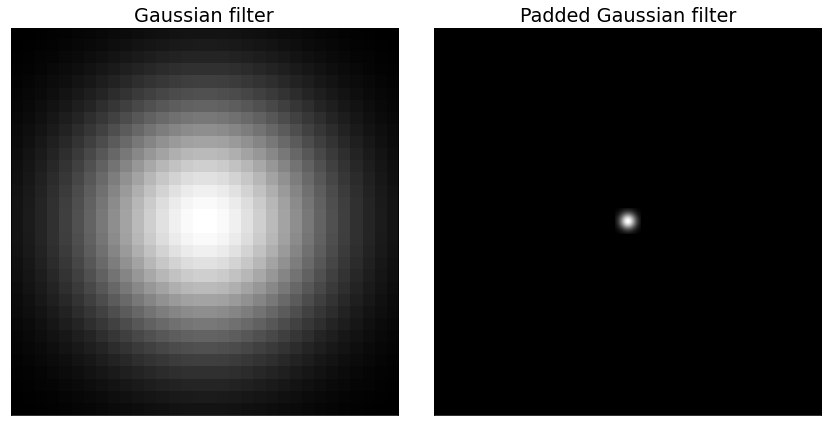

In [36]:
x = np.linspace(-5., 5., 2**5)
X, Y = np.meshgrid(x, x)
# Gaussian filter
g = gaussian = np.exp(-0.1 * (X**2 + Y**2))
# Disk-shaped filter
if not True:
    g[...] = 0.
    g[X**2+Y**2 < 10] = 1.
h = scipy.signal.convolve2d(f, g)
h2 = convolve2d(f, g)
print('Local version agrees with scipy?', np.allclose(h, h2))
g_pad = np.pad(g, len(f)-len(g))
plt.rc('font', size=16)
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=subplot_kw)
ax[0].set_title('Gaussian filter')
ax[0].imshow(g, cmap='gray');
ax[1].set_title('Padded Gaussian filter')
ax[1].imshow(g_pad, cmap='gray');
fig.tight_layout()

(256, 256) (32, 32) (287, 287)


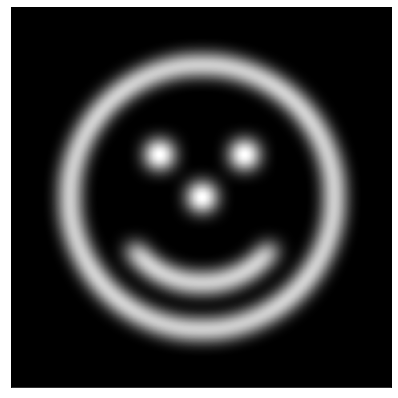

In [37]:
print(f.shape, g.shape, h.shape)
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=subplot_kw)
ax.imshow(h, cmap='gray');

We can also use the FFT trick in 2D:

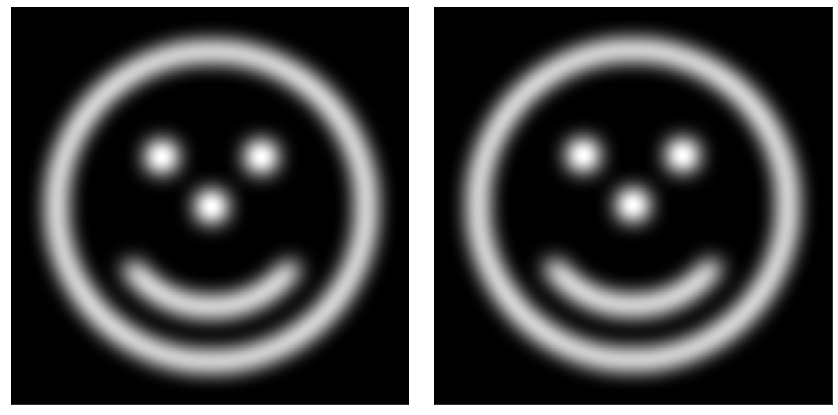

In [38]:
def fftconvolve(f, g):
    n, m = len(f), len(g)
    g = np.fft.ifftshift(np.pad(g, (n-m)//2))
    F = np.fft.fftn(f)
    G = np.fft.fftn(g)
    return np.real(np.fft.ifftn(F * G))

fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw=subplot_kw)
ax[0].imshow(scipy.signal.convolve2d(f, g, mode='same'), cmap='gray')
ax[1].imshow(fftconvolve(f, g), cmap='gray');
fig.tight_layout();

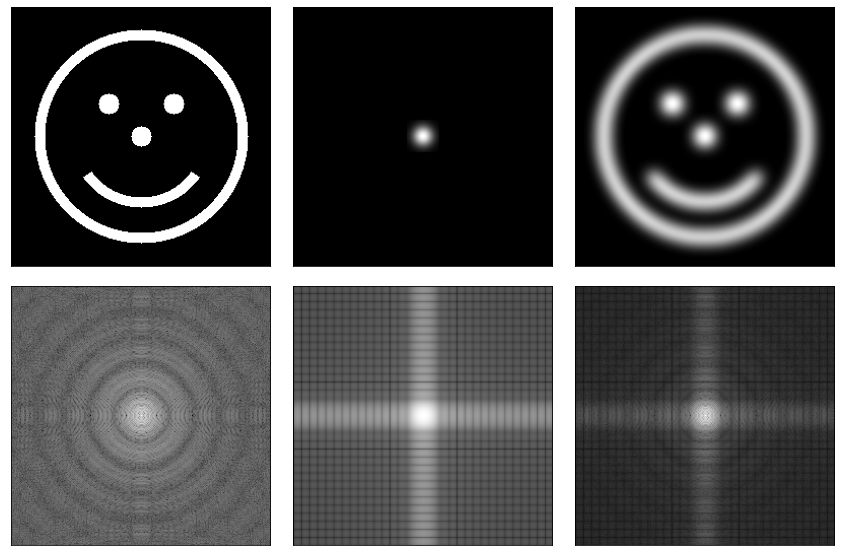

In [39]:
F = np.fft.fftshift(np.fft.fftn(f))
G = np.fft.fftshift(np.fft.fftn(
    np.fft.ifftshift(np.pad(g, (len(f)-len(g))//2))
))

gamma = 0.1
fig, ax = plt.subplots(2, 3, figsize=(12, 8), subplot_kw=subplot_kw)
ax[0, 0].imshow(f, cmap='gray')
ax[0, 1].imshow(np.pad(g, (len(f)-len(g))//2), cmap='gray');
ax[0, 2].imshow(fftconvolve(f, g), cmap='gray');
ax[1, 0].imshow(np.abs(F)**gamma, cmap='gray')
ax[1, 1].imshow(np.abs(G)**gamma, cmap='gray');
ax[1, 2].imshow(np.abs(F * G)**gamma, cmap='gray');
fig.tight_layout();

## Sharpening spatial filters

Spatial filters can also be used to *sharpen* an image rather than blurring it. Derivatives can be used to detect edges. The first and second derivative of a 1D signal can be approximated by finite differences:
\begin{align*}
\begin{split}
\frac{d}{dx} f(x) &\to f[i+1] - f[i] \\
\frac{d^2}{dx^2} f(x) &\to f[i+1] - 2 * f[i] + f[i-1]\\
\end{split}
\end{align*}

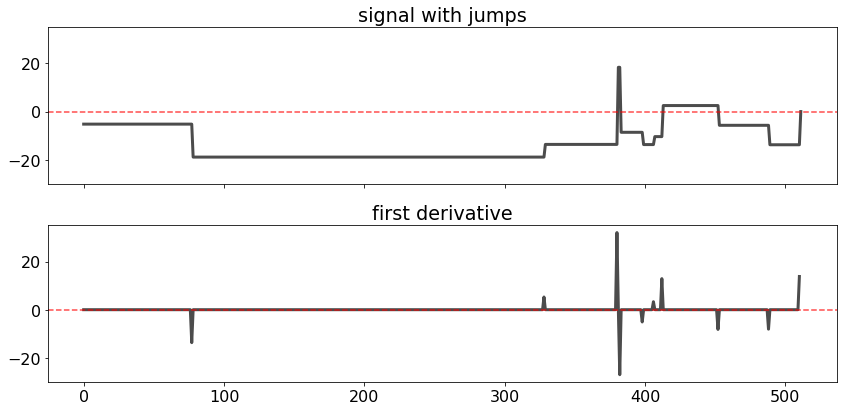

In [40]:
# 1D signal with change points
N = 2**9
# function levels and number of change points
f_min, f_max, n = -20, 20, 10
levels = np.random.uniform(f_min, f_max, n)
change_points = np.append(
    np.sort(np.random.randint(0, N, n)), N-1
)
f = np.zeros(N)
for start, end, level in zip(change_points, change_points[1:], levels):
    f[start:end] = level
    
plot_kw = dict(color='k', lw=3, alpha=0.7)
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex='all', sharey='all')
axes[0].set_title('signal with jumps')
axes[0].plot(f, **plot_kw)
axes[1].set_title('first derivative')
axes[1].plot(f[1:]-f[:-1], **plot_kw)
for ax in axes:
    ax.axhline(0., ls='--', color='r', alpha=0.7)
fig.tight_layout();

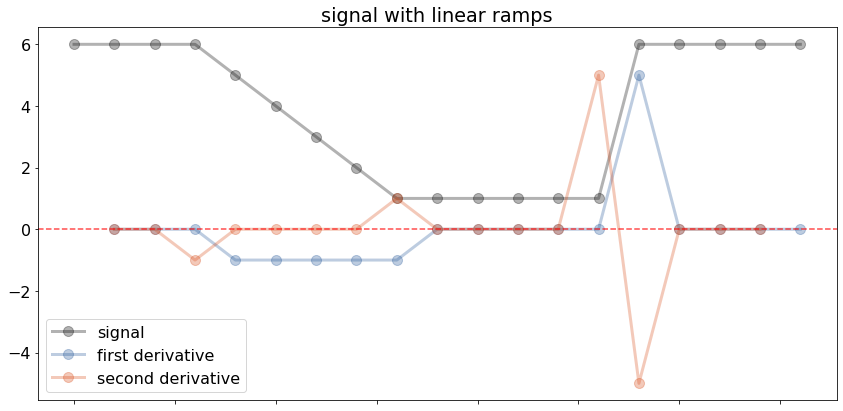

In [41]:
# signal with linear ramps

f = np.array([6, 6, 6, 6, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6])
x = np.arange(len(f))

plot_kw = dict(lw=3, alpha=0.3, marker='o', markersize=10)
fig, ax = plt.subplots(figsize=(12, 6), sharex='all', sharey='all')
ax.set_title('signal with linear ramps')
ax.plot(x, f, color=colors[3], label='signal', **plot_kw)
ax.plot(x[1:], f[1:]-f[:-1], label='first derivative', color=colors[1], **plot_kw)
ax.plot(x[1:-1], f[2:] - 2*f[1:-1] + f[:-2], label='second derivative', 
        color=colors[0], **plot_kw)
ax.axhline(0., ls='--', color='r', alpha=0.7)
ax.set_xticklabels([])
ax.legend()
fig.tight_layout();

In two-dimensions the finite difference version of the *Laplace* operator:
$$
\Delta f(x, y) = \frac{\partial^2 f(x, y)}{\partial x^2} + \frac{\partial^2 f(x, y)}{\partial y^2}
$$
Is obtained from
\begin{align*}
\begin{split}
\frac{\partial^2}{\partial x^2} f(x, y) &\to f[i+1, j] - 2 * f[i, j] + f[i-1, j]\\
\frac{\partial^2}{\partial y^2} f(x, y) &\to f[i, j+1] - 2 * f[i, j] + f[i, j-1]\\
\end{split}
\end{align*}
resulting in
$$
\Delta f(x, y) \to f[i, j+1] + f[i, j-1] + f[i+1, j] + f[i-1, j] - 4 * f[i, j] 
$$

This is a convolution with the spatial filter:
\begin{equation}\label{eq:laplacian}
\Delta = \begin{pmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{pmatrix}
\end{equation}

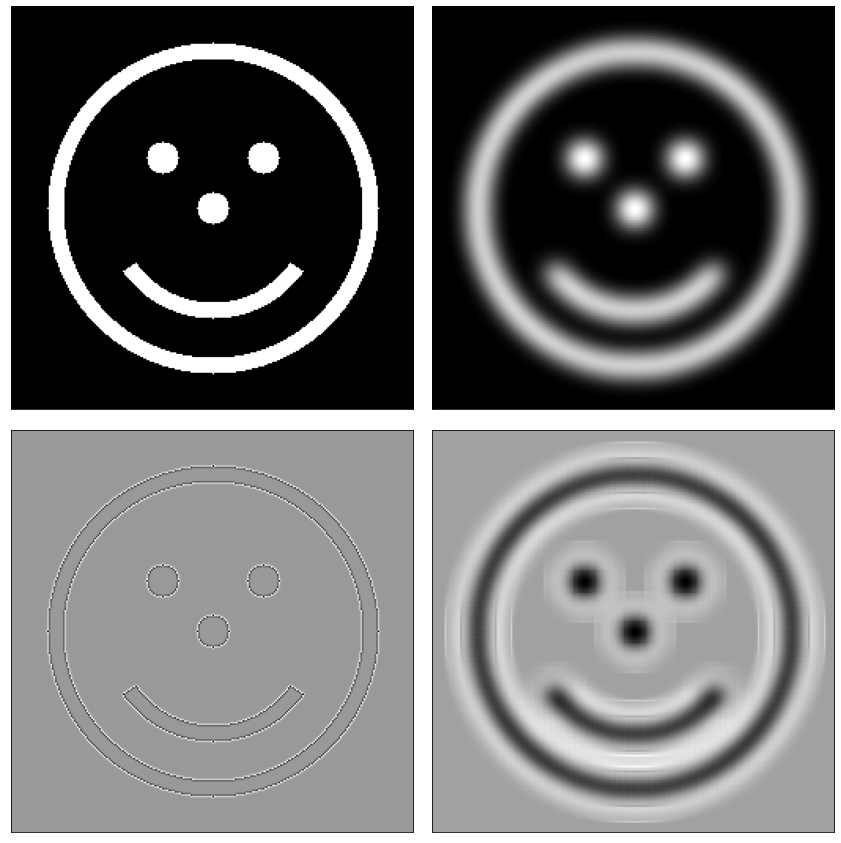

In [42]:
g = np.array([[0, 1, 0], 
              [1, -4, 1],
              [0, 1, 0]])
f = make_smiley()
h = scipy.signal.convolve2d(f, gaussian, mode='same')
f_sharp = scipy.signal.convolve2d(f, g, mode='same')
h_sharp = scipy.signal.convolve2d(h, g, mode='same')

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=subplot_kw)
axes[0, 0].imshow(f, cmap='gray')
axes[0, 1].imshow(h, cmap='gray')
axes[1, 0].imshow(f_sharp, cmap='gray')
axes[1, 1].imshow(h_sharp, cmap='gray')
fig.tight_layout()

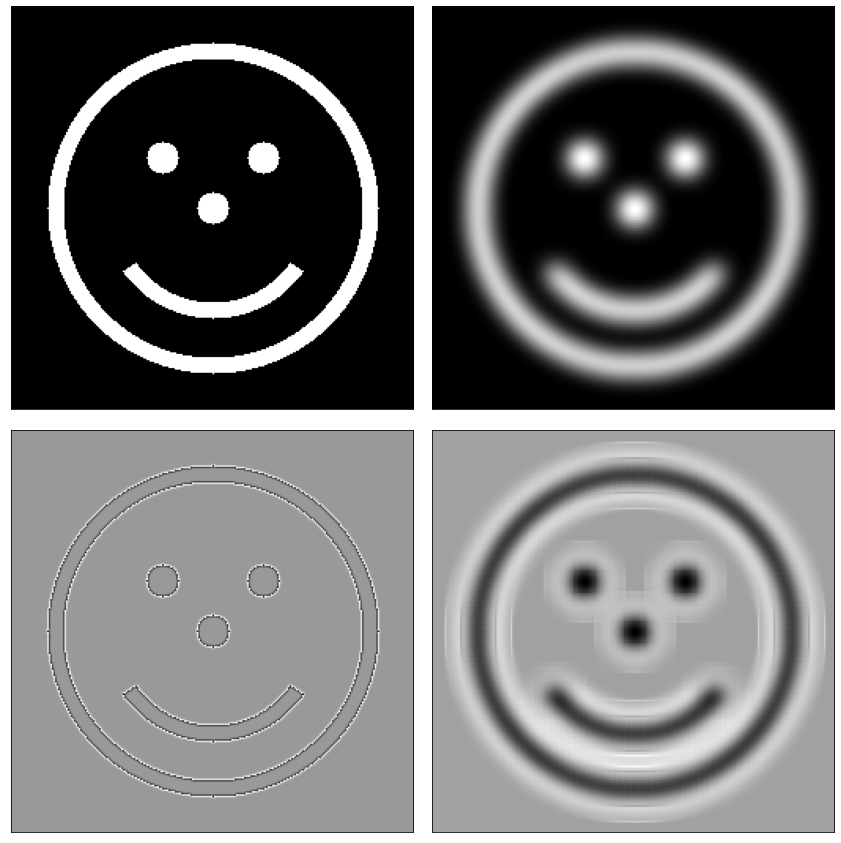

In [43]:
g = np.array([[1, 1, 1], 
              [1, -8, 1],
              [1, 1, 1]])
f = make_smiley()
h = scipy.signal.convolve2d(f, gaussian, mode='same')
f_sharp = scipy.signal.convolve2d(f, g, mode='same')
h_sharp = scipy.signal.convolve2d(h, g, mode='same')

fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=subplot_kw)
axes[0, 0].imshow(f, cmap='gray')
axes[0, 1].imshow(h, cmap='gray')
axes[1, 0].imshow(f_sharp, cmap='gray')
axes[1, 1].imshow(h_sharp, cmap='gray')
fig.tight_layout()